In [1]:
import scvelo as scv
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
import cellrank as cr
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

import psutil

mem = psutil.virtual_memory()
print(f"Total memory: {mem.total / 1e9:.2f} GB")
print(f"Available memory: {mem.available / 1e9:.2f} GB")
print(f"Used memory: {mem.used / 1e9:.2f} GB")
print(f"Memory usage: {mem.percent}%")
# print(globals().keys())

import gc
gc.collect()

Total memory: 1081.87 GB
Available memory: 1057.14 GB
Used memory: 17.92 GB
Memory usage: 2.3%


40

In [2]:
import sys

def get_vars(scope):
    return {k: v for k, v in scope.items() if not k.startswith('__') and not callable(v)}

def sizeof_fmt(num, suffix='B'):
    for unit in ['','K','M','G','T']:
        if abs(num) < 1024:
            return f"{num:.2f} {unit}{suffix}"
        num /= 1024
    return f"{num:.2f} P{suffix}"

all_vars = get_vars(globals())
var_sizes = {k: sys.getsizeof(v) for k, v in all_vars.items()}
for name, size in sorted(var_sizes.items(), key=lambda x: -x[1]):
    print(f"{name:<30} {sizeof_fmt(size)}")

_i2                            577.00 B
_i                             566.00 B
_i1                            566.00 B
_oh                            232.00 B
Out                            232.00 B
mem                            128.00 B
_ih                            120.00 B
In                             120.00 B
scv                            72.00 B
sc                             72.00 B
np                             72.00 B
pd                             72.00 B
ad                             72.00 B
plt                            72.00 B
cr                             72.00 B
sns                            72.00 B
psutil                         72.00 B
gc                             72.00 B
sys                            72.00 B
_dh                            64.00 B
_ii                            49.00 B
_iii                           49.00 B
_                              24.00 B
_1                             24.00 B


In [17]:
org_merge_KO_changed = sc.read("/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250726_D60_hg19/org_merge_KO_changed_post_velocity.h5ad")
# org_merge_WT_changed = sc.read("/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250726_D60_hg19/org_merge_WT_changed_post_velocity.h5ad")
# org_merge_changed = sc.read("/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250726_D60_hg19/org_merge_changed.h5ad")

In [16]:
print(org_merge_KO_changed)

AnnData object with n_obs × n_vars = 55582 × 25077
    obs: 'nCount_ambiguous', 'nFeature_ambiguous', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.rps', 'percent.rpl', 'RNA_snn_res.0.1', 'seurat_clusters', 'pANN_0.25_0.3_354', 'doublet_finder', 'pANN_0.25_0.03_363', 'pANN_0.25_0.005_663', 'pANN_0.25_0.17_698', 'pANN_0.25_0.005_717', 'pANN_0.25_0.01_706', 'pANN_0.25_0.005_755', 'pANN_0.25_0.001_663', 'pANN_0.25_0.26_795', 'Sample_ID', 'unintegrated_clusters', 'clusters_CSS_allEmbeddingDims_Point1', 'clusters_CSS_SigPs_Point1', 'clusters_Harmony_Point1', 'clusters_CSS_allEmbeddingDims_Point2', 'clusters_CSS_SigPs_Point2', 'clusters_Harmony_Point2', 'clusters_CSS_allEmbeddingDims_Point5', 'clusters_CSS_SigPs_Point5', 'clusters_Harmony_Point5', 'clusters_CSS_SigPs_0.6', 'Genotype', 'Day', 'HNOCA_annot_level_1_pruned', 'HNOCA_annot_level_2_pruned', 'css_cluster', 'RNA_snn_res.0.8'
    var: 

In [11]:
org_merge_WT_changed.var.to_csv("/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250726_D60_hg19/org_merge_WT_changed_var.csv")
org_merge_WT_changed.obs.to_csv("/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250726_D60_hg19/org_merge_WT_changed_obs.csv")
velocity_df = pd.DataFrame(org_merge_WT_changed.layers["velocity"], 
                           index=org_merge_WT_changed.obs_names,
                           columns=org_merge_WT_changed.var_names)

velocity_df.to_csv("/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250726_D60_hg19/org_merge_WT_changed_velocity.csv")
velocity_u_df = pd.DataFrame(org_merge_WT_changed.layers["velocity_u"],
                             index=org_merge_WT_changed.obs_names,
                             columns=org_merge_WT_changed.var_names)

velocity_u_df.to_csv("/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250726_D60_hg19/org_merge_WT_changed_velocity_u.csv")

In [18]:
org_merge_KO_changed.var.to_csv("/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250726_D60_hg19/org_merge_KO_changed_var.csv")
org_merge_KO_changed.obs.to_csv("/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250726_D60_hg19/org_merge_KO_changed_obs.csv")
velocity_df = pd.DataFrame(org_merge_KO_changed.layers["velocity"], 
                           index=org_merge_KO_changed.obs_names,
                           columns=org_merge_KO_changed.var_names)

velocity_df.to_csv("/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250726_D60_hg19/org_merge_KO_changed_velocity.csv")
velocity_u_df = pd.DataFrame(org_merge_KO_changed.layers["velocity_u"],
                             index=org_merge_KO_changed.obs_names,
                             columns=org_merge_KO_changed.var_names)

velocity_u_df.to_csv("/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250726_D60_hg19/org_merge_KO_changed_velocity_u.csv")

In [4]:
# scv.pl.proportions(org_merge_day20, groupby="Sample_ID")
# scv.pl.proportions(org_merge_no_day60, groupby="Sample_ID")
# scv.pl.proportions(org_merge_no_day60_WT, groupby="Sample_ID")
scv.pl.proportions(org_merge_changed, groupby="Sample_ID", show=False)
plt.savefig("/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250726_D60_hg19/proportions_KO.pdf", bbox_inches='tight')

# initial_size_unspliced = scv.core.get_initial_size(org_merge_WT_changed, layer='unspliced')
# initial_size_spliced = scv.core.get_initial_size(org_merge_WT_changed, layer='spliced')
# initial_size_ambiguous = scv.core.get_initial_size(org_merge_WT_changed, layer='ambiguous')

# total_counts = np.sum([initial_size_unspliced, initial_size_spliced, initial_size_ambiguous], axis=0)

# fraction_unspliced = initial_size_unspliced / total_counts
# mean_fraction_unspliced = fraction_unspliced.mean() 
# print(mean_fraction_unspliced)

# fraction_spliced = initial_size_spliced / total_counts
# mean_fraction_spliced = fraction_spliced.mean()
# print(mean_fraction_spliced)


NameError: name 'org_merge_KO_changed' is not defined

/home/z5358666/.local/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/z5358666/.local/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/z5358666/.local/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/z5358666/.local/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarnin

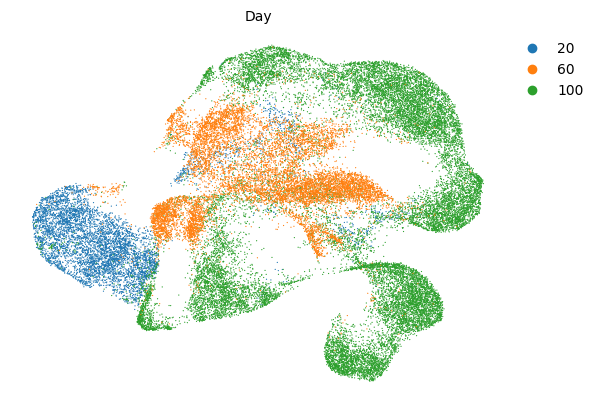

AnnData object with n_obs × n_vars = 39208 × 25077
    obs: 'nCount_ambiguous', 'nFeature_ambiguous', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.rps', 'percent.rpl', 'RNA_snn_res.0.1', 'seurat_clusters', 'pANN_0.25_0.3_354', 'doublet_finder', 'pANN_0.25_0.03_363', 'pANN_0.25_0.005_663', 'pANN_0.25_0.17_698', 'pANN_0.25_0.005_717', 'pANN_0.25_0.01_706', 'pANN_0.25_0.005_755', 'pANN_0.25_0.001_663', 'pANN_0.25_0.26_795', 'Sample_ID', 'unintegrated_clusters', 'clusters_CSS_allEmbeddingDims_Point1', 'clusters_CSS_SigPs_Point1', 'clusters_Harmony_Point1', 'clusters_CSS_allEmbeddingDims_Point2', 'clusters_CSS_SigPs_Point2', 'clusters_Harmony_Point2', 'clusters_CSS_allEmbeddingDims_Point5', 'clusters_CSS_SigPs_Point5', 'clusters_Harmony_Point5', 'clusters_CSS_SigPs_0.6', 'Genotype', 'Day', 'HNOCA_annot_level_1_pruned', 'HNOCA_annot_level_2_pruned', 'css_cluster', 'RNA_snn_res.0.8'
    var: 

In [15]:
scv.pl.scatter(org_merge_WT_changed, basis="X_umap.css.sigPCs", color="Day")
print(org_merge_WT_changed)

In [25]:
# scv.pp.filter_and_normalize(org_merge_KO_changed)
scv.pp.filter_genes_dispersion(org_merge_KO_changed)
sc.pp.neighbors(org_merge_KO_changed, n_neighbors=20, use_rep='X_css')
# scv.pp.moments(org_merge_changed, n_pcs = 20, n_neighbors = 20)
scv.pp.moments(org_merge_KO_changed, n_pcs=None, n_neighbors=None)

Normalized count data: X, spliced, unspliced.


/home/z5358666/.local/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Logarithmized X.
Extracted 1795 highly variable genes.
computing moments based on connectivities
    finished (0:00:13) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [26]:
scv.tl.recover_dynamics(org_merge_KO_changed)

recovering dynamics (using 1/64 cores)
    finished (0:31:24) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [27]:
scv.tl.velocity(org_merge_KO_changed, mode='dynamical')
scv.tl.velocity_graph(org_merge_KO_changed)

computing velocities
    finished (0:00:25) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/64 cores)
    finished (0:00:54) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [6]:
# org_merge_day20.write("/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250702_seurat_no_day_60/org_merge_day20.h5ad")
# org_merge_day60.write("/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250702_seurat_no_day_60/org_merge_no_day60.h5ad")
# org_merge_day60_WT.write("/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250702_seurat_no_day_60/org_merge_no_day60_WT.h5ad")


In [28]:
pdf_path = "/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250726_D60_hg19/org_merge_KO_changed_velocity.pdf"

r_palette = {
    "Dorsal Telencephalic IP": "#E41A1C",
    "Dorsal Telencephalic NPC": "#377EB8",
    "MC": "#4DAF4A",
    "NA": "#984EA3",
    "NC Derivatives": "#FF7F00",
    "Neuroepithelium": "#A65628",
    "Non-telencephalic NPC": "#F781BF",
    "Non-telencephalic Neuron": "#999999",
    "PSC": "#66C2A5",
    "Ventral Telencephalic NPC": "#FFD92F",
    "Ventral Telencephalic Neuron": "#7F00FF",
    "Astrocyte": "#4B0082",
    "CP": "#056517",
    "Dorsal Telencephalic Neuron": "#8DD3C7",
    "Glioblast": "#FFA33F",
    "OPC": "#80B1D3"
}

with PdfPages(pdf_path) as pdf:

    scv.pl.velocity_embedding_grid(
        org_merge_KO_changed,
        basis='umap.css.sigPCs',
        color='HNOCA_annot_level_2_pruned',
        palette=r_palette,
        size=50,
        scale=0.3,               
        alpha=0.7,
        legend_loc='lower left',
        legend_fontsize=5,
        show=False
    )
    
    fig = plt.gcf()
    fig.set_size_inches(10, 7)  
    pdf.savefig(fig)           
    plt.close()

computing velocity embedding
    finished (0:00:09) --> added
    'velocity_umap.css.sigPCs', embedded velocity vectors (adata.obsm)


/home/z5358666/.local/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/z5358666/.local/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/z5358666/.local/lib/python3.10/site-packages/scvelo/plotting/utils.py:65: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return cat(data)  # if data is categorical/array
/home/z5358666/.local/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype

In [29]:
pdf_path = "/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250726_D60_hg19/org_merge_KO_changed_latent_time_velocity_confidence.pdf"

scv.tl.latent_time(org_merge_KO_changed)
scv.tl.velocity_confidence(org_merge_KO_changed)

with PdfPages(pdf_path) as pdf:
    scv.pl.scatter(
        org_merge_KO_changed,  
        color="latent_time", 
        color_map='gnuplot', 
        basis="X_umap.css.sigPCs",
        size=80,
        show=False
    )
    fig = plt.gcf()
    fig.set_size_inches(10, 7)
    pdf.savefig(fig)
    plt.close()
    
    scv.pl.scatter(
        org_merge_KO_changed, 
        color="velocity_length", 
        color_map="gnuplot", 
        basis="X_umap.css.sigPCs",
        size=80,
        show=False
    )
    fig = plt.gcf()
    fig.set_size_inches(10, 7)
    pdf.savefig(fig)
    plt.close()

    scv.pl.scatter(
        org_merge_KO_changed, 
        color="velocity_confidence", 
        color_map="gnuplot", 
        basis="X_umap.css.sigPCs",
        size=80,
        show=False
    )

    fig = plt.gcf()
    fig.set_size_inches(10, 7)  
    pdf.savefig(fig)           
    plt.close()

computing terminal states
    identified 9 regions of root cells and 2 regions of end points .
    finished (0:00:10) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:12) --> added 
    'latent_time', shared time (adata.obs)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


/home/z5358666/.local/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/z5358666/.local/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/z5358666/.local/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/z5358666/.local/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarnin

In [ ]:
top_genes = org_merge_KO_changed.var['fit_likelihood'].sort_values(ascending=False).index[:5]
print(org_merge_KO_changed.var['fit_likelihood'].sort_values(ascending=False)[0:5])
print(org_merge_KO_changed)  

# indices = ['5770', '11156', '4798', '4757', '10175'] 
indices = ['13654', '12735', '10175', '15386', '13663']


for index in indices:
    gene_name = org_merge_KO_changed.var['gene_names'][index]

    pdf_path = f"/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250726_D60_hg19/{gene_name}_KO.pdf"
    print(pdf_path)
    
    with PdfPages(pdf_path) as pdf:

        scv.pl.scatter(
            org_merge_KO_changed,
            basis="X_umap.css.sigPCs",
            var_names = str(index),
            color = 'latent_time',
            size=30,
            show=False,
            legend_loc='upper left'
        )

        fig = plt.gcf()
        fig.set_size_inches(10, 7)
        pdf.savefig(fig)
        plt.close() 

        scv.pl.scatter(
            org_merge_KO_changed,
            basis="X_umap.css.sigPCs",
            var_names = str(index),
            color = 'HNOCA_annot_level_2_pruned',
            size=30,
            show=False,
            legend_loc='upper left'
        )

        fig = plt.gcf()
        fig.set_size_inches(10, 7)
        pdf.savefig(fig)
        plt.close()
        

        scv.pl.velocity(
            org_merge_KO_changed,
            basis="X_umap.css.sigPCs",
            var_names = str(index),
            color ='HNOCA_annot_level_2_pruned',
            size=30,
            show=False,
            legend_loc='upper left'
        )

        fig = plt.gcf()
        fig.set_size_inches(30, 7)
        pdf.savefig(fig)
        plt.close() 

In [32]:
org_merge_WT_changed.write("/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250726_D60_hg19/org_merge_WT_changed_post_velocity.h5ad")
org_merge_KO_changed.write("/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250726_D60_hg19/org_merge_KO_changed_post_velocity.h5ad")
# org_merge_changed.write("/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250726_D60_hg19/org_merge_changed_kNN2.h5ad")

In [ ]:
### BUFFER ####################

In [32]:
print(org_merge_day20.var['gene_names'])
print('FOXG1' in org_merge_day20.var['gene_names'].values)
matching_row = org_merge_day20.var[org_merge_day20.var['gene_names'] == 'FOXG1'] #16946
print(matching_row)

pdf_path = "/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250702_seurat_no_day_60/FOXG1_day20.pdf"


with PdfPages(pdf_path) as pdf:
    scv.pl.velocity(org_merge_day20, var_names=['16946'], basis='X_umap.css.sigPCs', color="HNOCA_annot_level_2_pruned", show=False, size=10)
    fig = plt.gcf()
    fig.set_size_inches(30, 7)  
    pdf.savefig(fig)           
    plt.close()


0              WASH7P
1           MIR6859-1
2             FAM138A
3        RP11-34P13.7
4        RP11-34P13.8
             ...     
60670       ANKRD36P1
60671    RP11-557B9.1
60672         TPTE2P4
60673         CYCSP49
60674         CTBP2P1
Name: gene_names, Length: 60675, dtype: object
True
      gene_names  gene_count_corr  fit_r2  fit_alpha  fit_beta  fit_gamma  \
16946      FOXG1           0.1548     0.0        NaN       NaN        NaN   

       fit_t_  fit_scaling  fit_std_u  fit_std_s  fit_likelihood  fit_u0  \
16946     NaN          NaN        NaN        NaN             NaN     NaN   

       fit_s0  fit_pval_steady  fit_steady_u  fit_steady_s  fit_variance  \
16946     NaN              NaN           NaN           NaN           NaN   

       fit_alignment_scaling  velocity_genes  
16946                    NaN           False  


/home/z5358666/.local/lib/python3.10/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


In [3]:
# print(org_merge_day20)
org_merge_day20_WT = org_merge_day20[org_merge_day20.obs["Genotype"] == "WT"].copy()
org_merge_day20_KO = org_merge_day20[org_merge_day20.obs["Genotype"] == "KO"].copy()

In [4]:
scv.pp.filter_and_normalize(org_merge_no_day60_KO)
sc.pp.neighbors(org_merge_no_day60_KO, n_neighbors=20, use_rep='X_pca')
scv.pp.moments(org_merge_no_day60_KO, n_pcs = 20, n_neighbors = 20)
scv.tl.recover_dynamics(org_merge_no_day60_KO)
scv.tl.velocity(org_merge_no_day60_KO, mode='dynamical')
scv.tl.velocity_graph(org_merge_no_day60_KO)

Logarithmized X.


/home/z5358666/.local/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


computing moments based on connectivities
    finished (0:00:12) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/32 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:57:11) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:01:15) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/32 cores)
    finished (0:02:19) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [ ]:
pdf_path = "/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250702_seurat_no_day_60/org_merge_no_day60_UMAP_HNOCA_annot_level_2_pruned_WT.pdf"

r_palette = {
    "Dorsal Telencephalic IP": "#E41A1C",
    "Dorsal Telencephalic NPC": "#377EB8",
    "MC": "#4DAF4A",
    "NA": "#984EA3",
    "NC Derivatives": "#FF7F00",
    "Neuroepithelium": "#A65628",
    "Non-telencephalic NPC": "#F781BF",
    "Non-telencephalic Neuron": "#999999",
    "PSC": "#66C2A5",
    "Ventral Telencephalic NPC": "#FFD92F",
    "Ventral Telencephalic Neuron": "#7F00FF",
    "Astrocyte": "#A6D854",
    "CP": "#B3B3B3",
    "Dorsal Telencephalic Neuron": "#8DD3C7",
    "Glioblast": "#FB8072",
    "OPC": "#80B1D3"
}



In [22]:
import numpy as np

pdf_path = "/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250702_seurat_no_day_60/velocity_stream_org_merge_day20_HNOCA_annot_level_2_pruned_filtered.pdf"

# Define your categories of interest
target_celltypes = {
    "Neuroepithelium": "#377EB8",
    "Ventral Telencephalic Neuron": "#7B3294",
    "Non-telencephalic Neuron": "#FDAE6B",
    "PSC": "#E41A1C",    
    "Other": "#4DAF4A"     
}

# Create a new annotation column
org_merge_day20.obs['celltype_grouped'] = org_merge_day20.obs['HNOCA_annot_level_2_pruned'].copy()
org_merge_day20.obs['celltype_grouped'] = org_merge_day20.obs['celltype_grouped'].apply(
    lambda x: x if x in target_celltypes else 'Other'
)

# Plot
with PdfPages(pdf_path) as pdf:
    scv.pl.velocity_embedding_grid(
        org_merge_day20,
        basis='umap.css.sigPCs',
        color='celltype_grouped',
        palette=target_celltypes,
        size=50,
        scale=0.3,
        alpha=0.7,
        legend_loc='lower left',
        legend_fontsize=5,
        show=False
    )

    fig = plt.gcf()
    fig.set_size_inches(10, 7)
    pdf.savefig(fig)
    plt.close()


In [26]:
pdf_path = "/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250702_seurat_no_day_60/org_merge_day20_UMAP_HNOCA_annot_level_2_pruned.pdf"

with PdfPages(pdf_path) as pdf:
    scv.pl.scatter(
        org_merge_day20,
        basis='umap.css.sigPCs',
        color='celltype_grouped',
        palette=target_celltypes,
        size=50,
        alpha=0.7,
        legend_loc='lower left',
        legend_fontsize=5,
        show=False
    )

    fig = plt.gcf()
    fig.set_size_inches(10, 7)
    pdf.savefig(fig)
    plt.close()

In [30]:
from matplotlib.backends.backend_pdf import PdfPages

pdf_path = "/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250702_seurat_no_day_60/org_merge_day20_UMAP_HNOCA_annot_Genotype.pdf"

# Define genotype colors
genotype_palette = {
    "WT": "#6aa84f",   # Yellow-gold
    "KO": "#f1c232"    # Green
}

# (Optional) Clean the values if needed
org_merge_day20.obs['genotype_grouped'] = org_merge_day20.obs['Genotype'].apply(
    lambda x: x if x in genotype_palette else 'Other'
)

with PdfPages(pdf_path) as pdf:
    scv.pl.scatter(
        org_merge_day20,
        basis='umap.css.sigPCs',
        color='genotype_grouped',     # Set the correct column here
        palette=genotype_palette,     # Use the defined palette
        size=10,
        alpha=0.7,
        legend_loc='lower left',
        legend_fontsize=5,
        show=False
    )

    fig = plt.gcf()
    fig.set_size_inches(10, 7)
    pdf.savefig(fig)
    plt.close()


In [24]:
org_merge_no_day60_KO.obs["highlight"] = org_merge_no_day60_KO.obs["HNOCA_annot_level_1_pruned"] == "PSC"
pdf_path = "/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250702_seurat_no_day_60/org_merge_no_day60_UMAP_HNOCA_annot_level_2_pruned_KO_PSC_abundance.pdf"


with PdfPages(pdf_path) as pdf:

    scv.pl.scatter(org_merge_no_day60_KO, color="highlight", palette=["lightgrey", "red"], title="PSC", basis="X_umap.css.sigPCs", show=False)
    
    fig = plt.gcf()
    fig.set_size_inches(10, 7)  
    pdf.savefig(fig)           
    plt.close()

NameError: name 'org_merge_no_day60_KO' is not defined

In [53]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

pdf_path = "/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250702_seurat_no_day_60/org_merge_day20_bar_graph.pdf"

cell_type_counts = org_merge_day20.obs['HNOCA_annot_level_2_pruned'].value_counts(normalize=True)

# Save to PDF
with PdfPages(pdf_path) as pdf:
    fig, ax = plt.subplots(figsize=(10, 7))

    # Plot bar with log scale
    cell_type_counts.plot(kind='bar', color='steelblue', ax=ax)
    ax.set_yscale('log')
    ax.set_ylabel('Fraction of cells (log scale)')
    ax.set_xlabel('Cell type')
    ax.set_title('Cell type distribution in D20 organoid')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Save and close
    pdf.savefig(fig)
    plt.close(fig)



In [4]:
###### ONLY USE FOR DAY 20

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import LogLocator, ScalarFormatter

pdf_path = "/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250702_seurat_no_day_60/org_merge_day20_WT_bar_graph_combined.pdf"

# Get raw counts
cell_type_series = org_merge_day20_WT.obs['HNOCA_annot_level_2_pruned']

# Define your categories of interest
main_categories = [
    "Neuroepithelium",
    "Non-telencephalic Neuron",
    "Ventral Telencephalic Neuron",
    "PSC",
    # "Dorsal Telencephalic Neuron",
]

# Count matching categories
grouped_counts = {
    category: (cell_type_series == category).sum()
    for category in main_categories
}

# Count all other cell types
grouped_counts["Other"] = cell_type_series[~cell_type_series.isin(main_categories)].count()

# Normalize to get fractions
total_cells = len(cell_type_series)
grouped_fractions = {k: v / total_cells for k, v in grouped_counts.items()}

# --- Plot log-scale bar chart ---
with PdfPages(pdf_path) as pdf:
    fig, ax = plt.subplots(figsize=(10, 7))
    
    labels = list(grouped_fractions.keys())
    values = list(grouped_fractions.values())
    
    ax.bar(labels, values, color='steelblue')
    ax.set_yscale('log')
    ax.set_ylabel('Fraction of cells (log scale)')
    ax.set_xlabel('Cell type group')
    ax.set_title('Cell type distribution in D20 organoid (log-scale bar chart)')
    plt.xticks(rotation=45, ha='right')

    # Optional: show more y-ticks
    ax.yaxis.set_major_locator(LogLocator(base=10.0, subs=(1.0,), numticks=10))
    ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs=range(2, 10), numticks=100))
    ax.yaxis.set_minor_formatter(ScalarFormatter())
    ax.yaxis.set_minor_formatter(plt.NullFormatter())  # Hide minor tick labels

    plt.tight_layout()
    pdf.savefig(fig)
    plt.close(fig)


In [32]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import LogLocator, ScalarFormatter
import numpy as np

pdf_path = "/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250702_seurat_no_day_60/org_merge_day20_WT_KO_bar_graph_combined.pdf"

# Define categories of interest
main_categories = [
    "Neuroepithelium",
    "Non-telencephalic Neuron",
    "Ventral Telencephalic Neuron",
    "PSC",
    # "Dorsal Telencephalic Neuron",
]

def compute_grouped_fractions(cell_type_series, main_categories):
    grouped_counts = {
        category: (cell_type_series == category).sum()
        for category in main_categories
    }
    grouped_counts["Other"] = cell_type_series[~cell_type_series.isin(main_categories)].count()
    
    total_cells = len(cell_type_series)
    return {k: v / total_cells for k, v in grouped_counts.items()}

# Compute fractions
fractions_WT = compute_grouped_fractions(org_merge_day20_WT.obs['HNOCA_annot_level_2_pruned'], main_categories)
fractions_KO = compute_grouped_fractions(org_merge_day20_KO.obs['HNOCA_annot_level_2_pruned'], main_categories)

# Prepare plot
labels = list(fractions_WT.keys())  # Same keys in both dictionaries
x = np.arange(len(labels))          # the label locations
width = 0.35                        # width of the bars

with PdfPages(pdf_path) as pdf:
    fig, ax = plt.subplots(figsize=(10, 7))

    # Bar plots
    ax.bar(x - width/2, [fractions_WT[k] for k in labels], width, label='WT', color='#6aa84f')
    ax.bar(x + width/2, [fractions_KO[k] for k in labels], width, label='KO', color='#f1c232')

    ax.set_yscale('log')
    ax.set_ylabel('Proportion (log scale)')
    ax.set_xlabel('Cell type')
    ax.set_title('Cell type distribution in D20 organoids (WT vs KO)')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right')

    # Log-scale ticks
    ax.yaxis.set_major_locator(LogLocator(base=10.0, subs=(1.0,), numticks=10))
    ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs=range(2, 10), numticks=100))
    ax.yaxis.set_minor_formatter(plt.NullFormatter())

    ax.legend()
    plt.tight_layout()
    pdf.savefig(fig)
    plt.close(fig)


In [4]:
### USE FOR DAY 100
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

pdf_path = "/srv/scratch/voineagu/PROJECTS/GavinLi/Combined/Results/250702_seurat_no_day_60/org_merge_no_day60_KO_bar_graph.pdf"

cell_type_counts = org_merge_no_day60_KO.obs['HNOCA_annot_level_2_pruned'].value_counts(normalize=True)

# Save to PDF
with PdfPages(pdf_path) as pdf:
    fig, ax = plt.subplots(figsize=(10, 7))

    # Plot bar with log scale
    cell_type_counts.plot(kind='bar', color='steelblue', ax=ax)
    ax.set_yscale('log')
    ax.set_ylabel('Fraction of cells (log scale)')
    ax.set_xlabel('Cell type')
    ax.set_title('Cell type distribution in D20 organoid')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Save and close
    pdf.savefig(fig)
    plt.close(fig)


computing latent time using root_cells as prior
    finished (0:00:35) --> added 
    'latent_time', shared time (adata.obs)


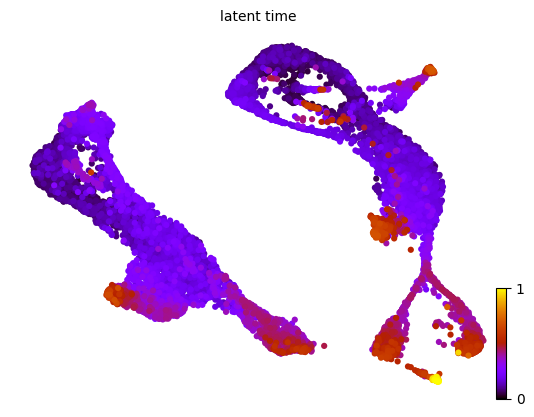

In [11]:

scv.tl.latent_time(org_merge_day20)
scv.pl.scatter(
    org_merge_day20,  
    color="latent_time", 
    color_map='gnuplot', 
    basis="X_umap.css.sigPCs",
    size=80,
    show=True
)